# [DeepLearning] [1] DNN - 다층 퍼셉트론

## 1. 퍼셉트론 모델 학습

와인(Wine) 데이터셋을 사용하여 퍼셉트론 모델을 학습하고 정확도를 평가하세요.

1. sklearn.datasets에서 load_wine() 함수를 이용하여 데이터를 로드하세요.

In [1]:
from sklearn.datasets import load_wine

wine = load_wine()

2. 와인 데이터셋에서 alcohol(알코올)과 malic_acid(사과산) 두 개의 특성만을 사용하여 와인 종류를 예측하는 모델을 만드세요.

In [2]:
# alcohol, malic_acid 두 개의 특성만 선택
X = wine.data[:, :2]  

3. 타겟 변수는 class 0인지 아닌지로 설정하세요.

In [3]:
y = (wine.target == 0) 

4. 데이터를 80% 학습 데이터, 20% 테스트 데이터로 분할하세요.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. StandardScaler를 사용하여 데이터를 표준화하세요.


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

6. Perceptron 모델을 학습시키세요.


In [6]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(max_iter=1000, random_state=42)
perceptron.fit(X_train, y_train)

Perceptron(random_state=42)

7. 테스트 데이터에 대해 예측한 후 정확도를 계산하세요.


In [7]:
from sklearn.metrics import accuracy_score

y_pred_perceptron = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_perceptron)
print("퍼셉트론 정확도:", accuracy)

퍼셉트론 정확도: 0.9166666666666666


8. 와인 데이터셋의 두 개 특성 (alcohol, malic_acid) 에 대한 결정 경계(Decision Boundary) 를 그래프로 나타내세요.

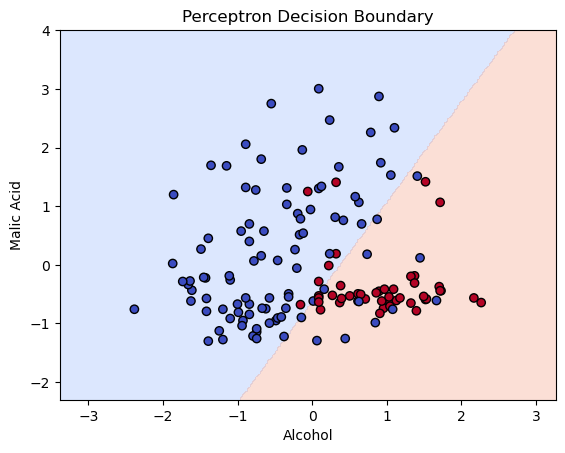

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.coolwarm)
    plt.xlabel("Alcohol")
    plt.ylabel("Malic Acid")
    plt.title(title)
    plt.show()

plot_decision_boundary(perceptron, X_train, y_train, "Perceptron Decision Boundary")

## 2. 다층 퍼셉트론 모델 학습

위에서 사용한 와인 데이터셋을 이용하여 다층 퍼셉트론(Multi-layer Perceptron, MLP) 모델을 학습하세요.

1. MLPClassifier를 사용하여 입력층(2개 특성), 은닉층(10개 뉴런 1개 층), 출력층(이진 분류) 모델을 만드세요.

* 활성화 함수: relu
* 옵티마이저: adam
* 최대 반복 횟수: 1000

In [9]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=1000, random_state=42)

2. MLPClassifier를 학습시키세요.

In [10]:
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

3. 테스트 데이터에 대해 예측한 후 정확도를 계산하세요.

In [11]:
y_pred_mlp = mlp.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("MLP 정확도:", accuracy_mlp)


MLP 정확도: 0.8888888888888888


4. 결정 경계를 시각화해보세요.

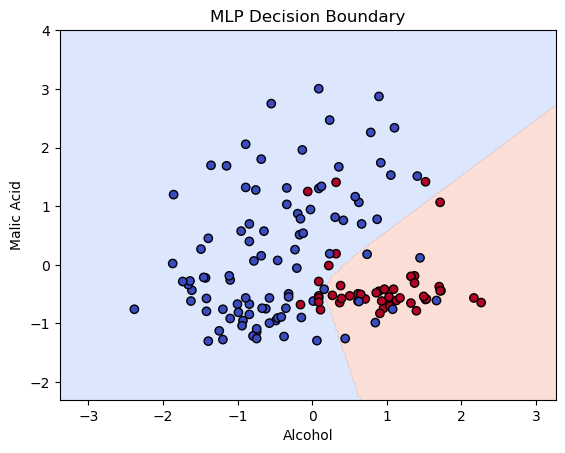

In [12]:
plot_decision_boundary(mlp, X_train, y_train, "MLP Decision Boundary")